In [17]:
import os
import tkinter
from tkinter import filedialog

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_file():
    root = tkinter.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(initialdir=os.curdir, title='Select txt file',
                                           filetypes=(("all files", "*.*"), ))
    root.destroy()
    return file_path


def save_file():
    root = tkinter.Tk()
    root.withdraw()
    file_path = filedialog.asksaveasfilename(initialdir=os.curdir, title='Select file',
                                             filetypes=(("all files", "*.*"),))
    root.destroy()
    return file_path

In [114]:
def get_img_hist(image):
    img_width, img_height, img_channel = image.shape
    ret = dict.fromkeys(range(img_channel))
    for channel in ret:
        ret[channel] = dict.fromkeys(range(256), 0)
    for channel in range(img_channel):
        for i in range(img_width):
            for j in range(img_height):
                value = image[i, j, channel]
                ret[channel][value] += 1
        for i in ret[channel]:
            ret[channel][i] = ret[channel][i] / (img_height * img_width)
    return ret

In [99]:
def histogram_equalization(image, image_hist:dict):
    img_width, img_height, img_channel = image.shape
    mapper = dict.fromkeys(image_hist.keys())
    ret = np.empty_like(image)
    for channel in image_hist:
        cur_channel = image_hist[channel]
        mapper[channel] = dict.fromkeys(cur_channel.keys())
        cumulate = 0
        for l_in in cur_channel:
            cumulate += cur_channel[l_in]
            mapper[channel][l_in] = round(cumulate * 255)
    for channel in range(img_channel):
        for i in range(img_width):
            for j in range(img_height):
                value = image[i, j,channel]
                equalized = mapper[channel][value]
                ret[i][j][channel] = equalized
    return ret, mapper

In [117]:
img = Image.open(r"C:\Users\seclab\Pictures\7d235a3fb25925cce788409c9b25cd3f.jpg")
img = np.array(img)

In [118]:
hist = get_img_hist(img)

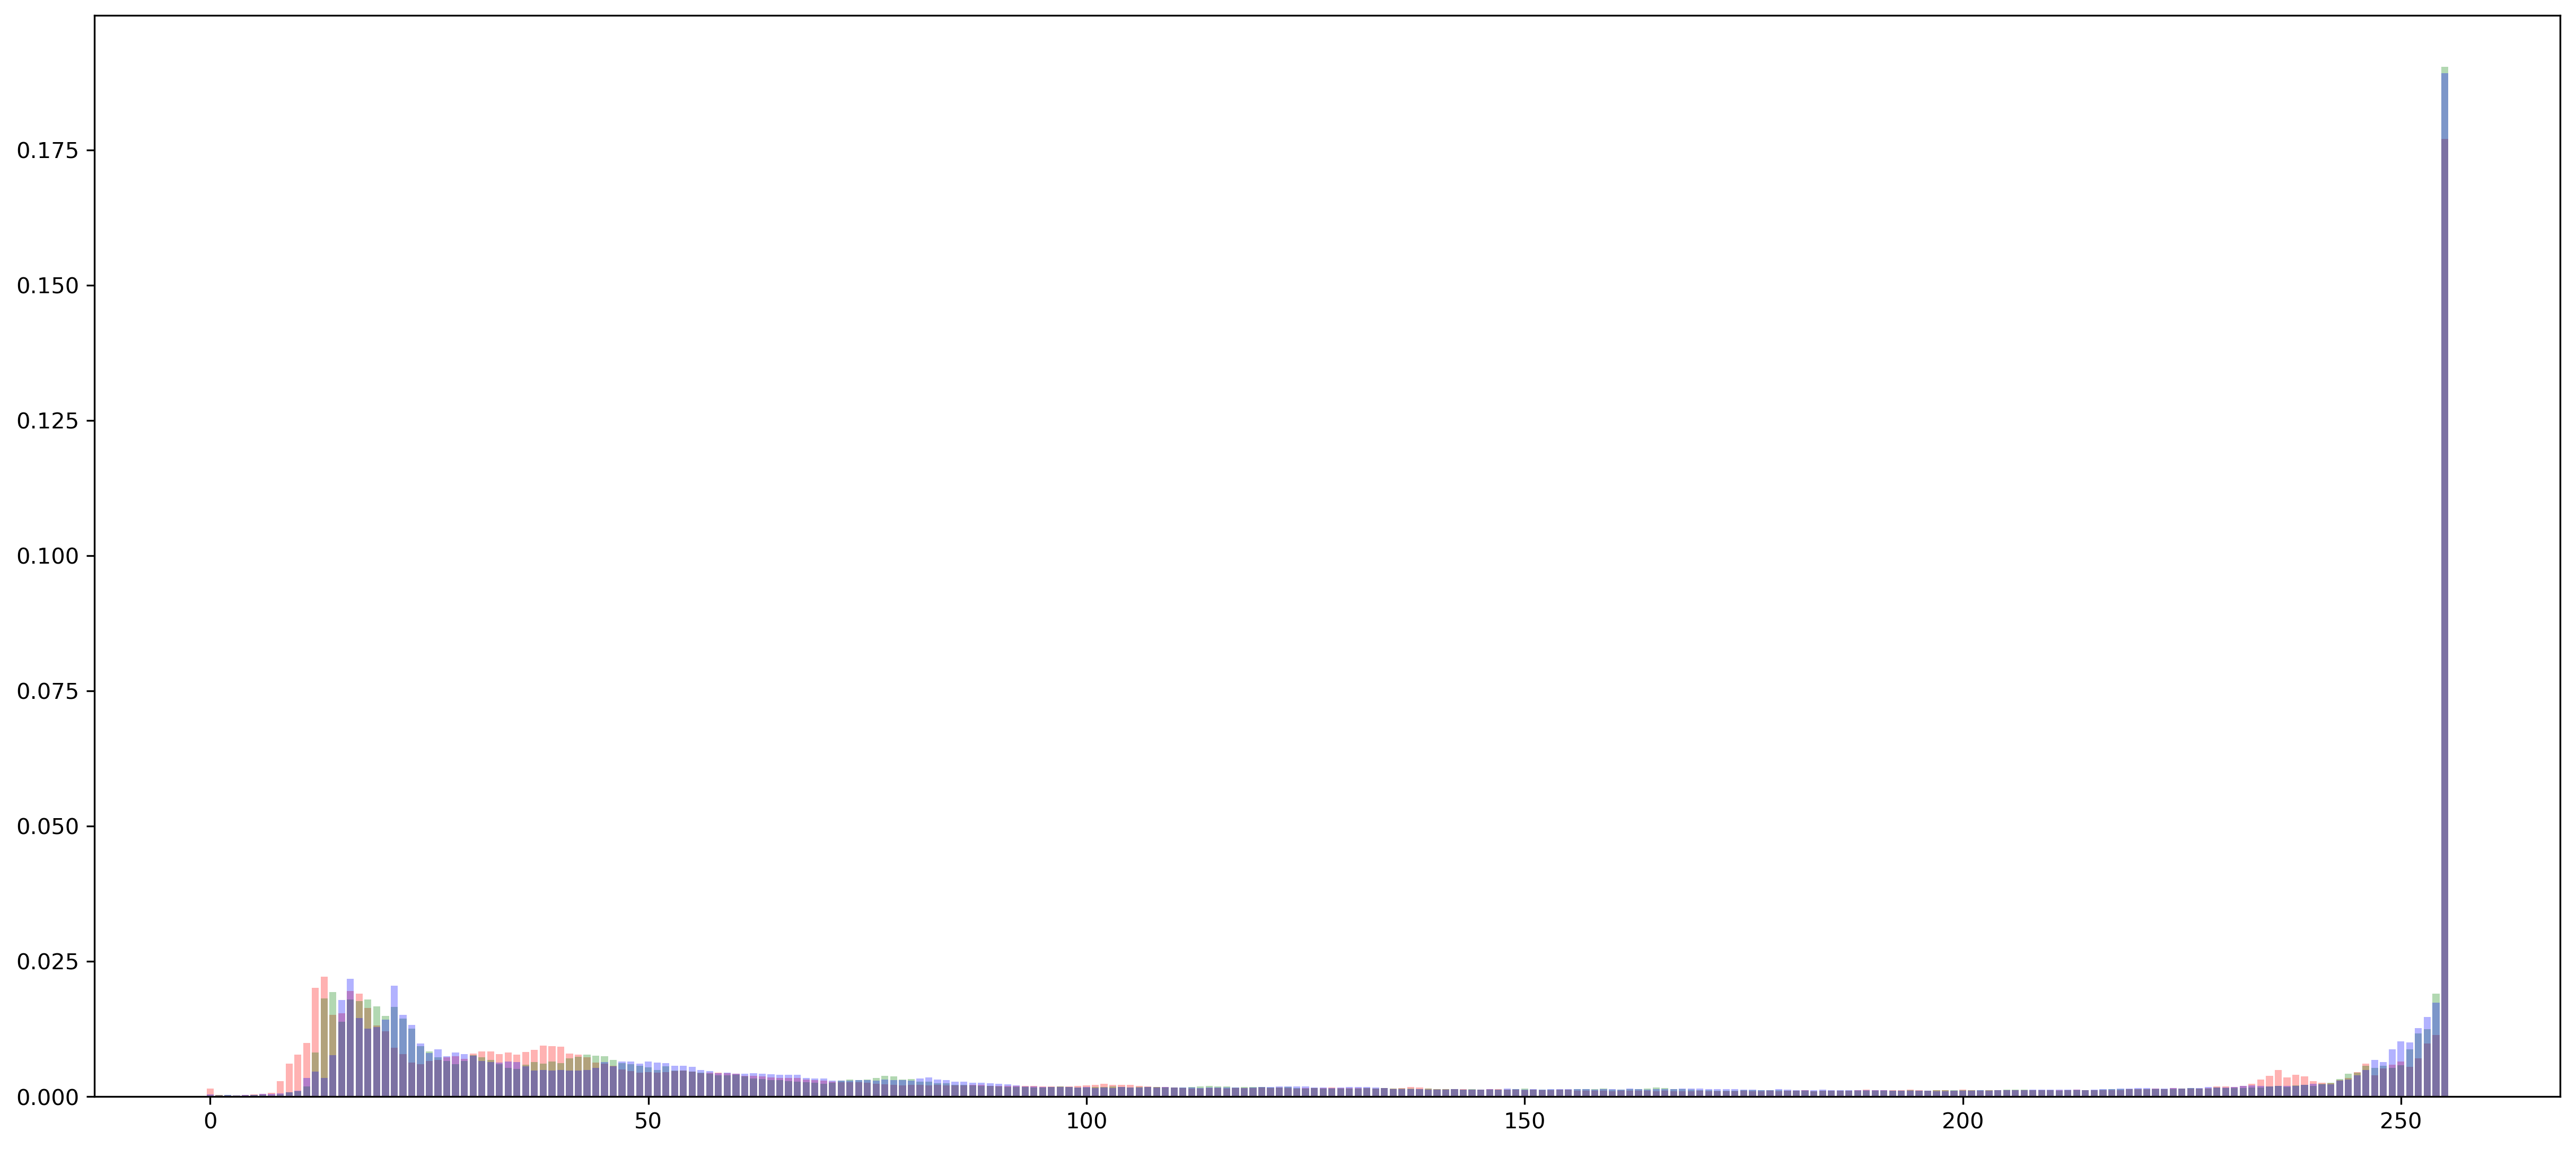

In [126]:
plt.figure(figsize=(20, 9), dpi=300)
colors = ['red', 'green' ,'blue']
for channel in result:
    plt.bar([*hist[channel].keys()], [*hist[channel].values()], alpha=0.3, color=colors[channel])

In [121]:
result_img, mapper = histogram_equalization(img, hist)
result_hist = get_img_hist(result_img)

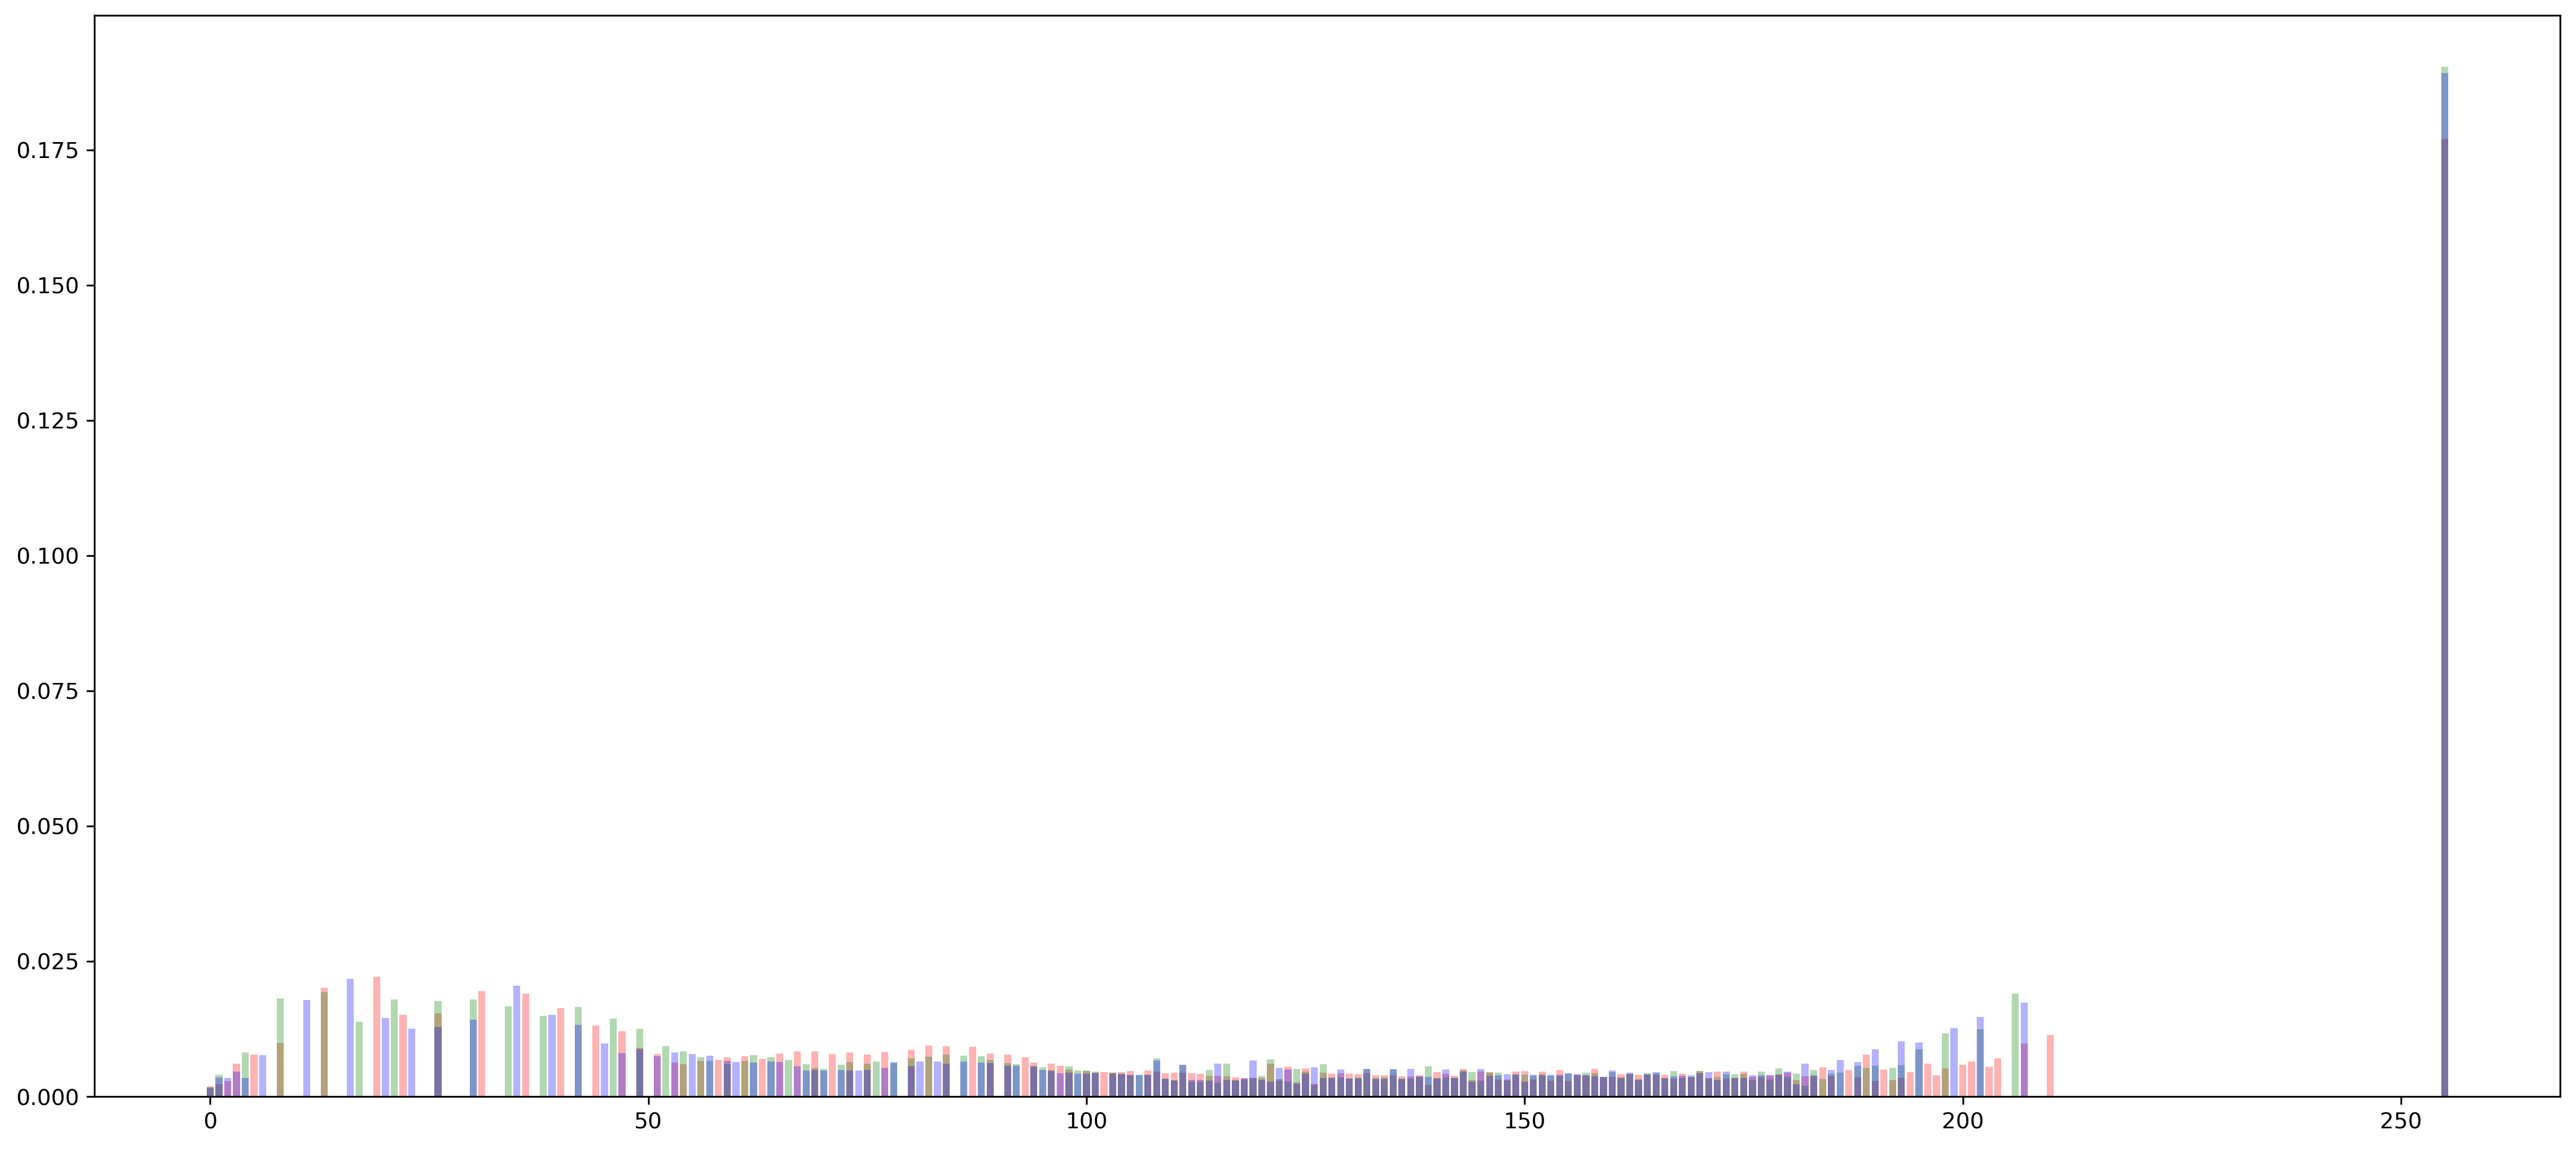

In [125]:
plt.figure(figsize=(20, 9), dpi=300)
colors = ['red', 'green' ,'blue']
for channel in mapper:
    plt.bar([*result_hist[channel].keys()], [*result_hist[channel].values()], alpha=0.3, color=colors[channel])

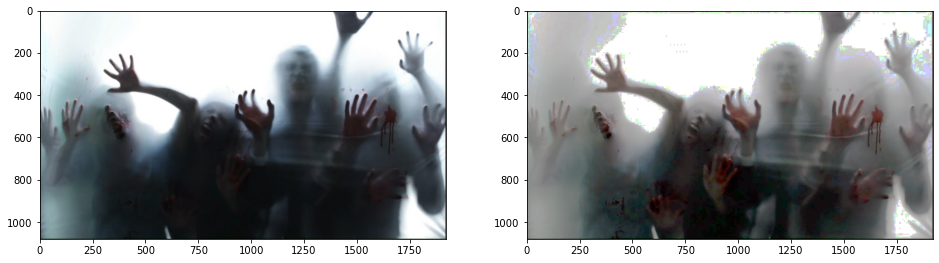

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
axs[0].imshow(img)
axs[1].imshow(result_img)
plt.show()